## Pandas

### Table of contents:
* [Import biblioteki](#0)
* [Exercise 121](#1)
* [Exercise 122](#2)
* [Exercise 123](#3)
* [Exercise 124](#4)
* [Exercise 125](#5)
* [Exercise 126](#6)
* [Exercise 127](#7)
* [Exercise 128](#8)
* [Exercise 129](#9)
* [Exercise 130](#10)

### <a name='0'></a> Import of libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'1.18.4'

The _fetch_financial_data()_ function fetches data on listed companies. It will be used in the following exercises. To download data of a specific company, you must provide the ticker (symbol) of the company.

Some sample company tickers:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Exercise 121
Using the _fetch_financial_data()_ function, download Google (Alphabet) quotes and assign to the variable _google_. Display object _google_.

In [ ]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-15,1348.26,1374.58,1339.00,1373.06,2077199
2020-05-14,1333.52,1357.37,1323.30,1356.86,1833017
2020-05-13,1376.16,1385.33,1328.01,1348.33,2018404
2020-05-12,1408.22,1414.33,1374.51,1375.18,1695874
2020-05-11,1376.79,1415.53,1375.50,1403.59,1635856
...,...,...,...,...,...
2015-05-27,548.68,555.29,546.58,554.25,1742200
2015-05-26,552.58,553.33,542.97,547.19,1866724
2015-05-22,554.46,558.24,553.62,554.52,1213200


### <a name='2'></a> Exercise 122
Display basic information about _google_ object.

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-05-15 to 2015-05-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Display basic statistics for _google_.

In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,985.795146,994.724084,976.482779,985.996920,1.801721e+06
std,222.890229,225.424089,220.680834,223.260574,9.549839e+05
min,542.250000,544.050000,538.850000,540.040000,5.211410e+05
25%,787.170000,792.000000,778.190000,785.410000,1.222203e+06
50%,1020.010000,1037.670000,1006.250000,1022.640000,1.556298e+06
75%,1155.620000,1174.070000,1146.730000,1161.950000,2.069127e+06
max,1527.200000,1530.740000,1520.980000,1524.870000,1.285810e+07


Note the precision of individual statistics.
Try setting the appropriate _pandas_ library options to display data with two decimal places.

__Tip:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
pd.set_option('precision', 2)
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1.26e+03
mean,985.80,994.72,976.48,986.00,1.80e+06
std,222.89,225.42,220.68,223.26,9.55e+05
min,542.25,544.05,538.85,540.04,5.21e+05
25%,787.17,792.00,778.19,785.41,1.22e+06
50%,1020.01,1037.67,1006.25,1022.64,1.56e+06
75%,1155.62,1174.07,1146.73,1161.95,2.07e+06
max,1527.20,1530.74,1520.98,1524.87,1.29e+07


__Additionally:__
The following setting will also suppress mathematical notation (see column _Volume_).

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,985.80,994.72,976.48,986.00,1801720.72
std,222.89,225.42,220.68,223.26,954983.92
min,542.25,544.05,538.85,540.04,521141.00
25%,787.17,792.00,778.19,785.41,1222203.00
50%,1020.01,1037.67,1006.25,1022.64,1556298.00
75%,1155.62,1174.07,1146.73,1161.95,2069127.00
max,1527.20,1530.74,1520.98,1524.87,12858100.00


Build a simple chart for _google_ closing price (_Close_)

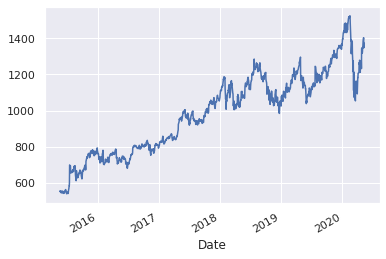

In [ ]:
google['Close'].plot()

### <a name='3'></a> Exercise 123
Replace the _Date_ index with a column. Permanently assign changes to the _google_.

In [ ]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2020-05-15,1348.26,1374.58,1339.00,1373.06,2077199
1,2020-05-14,1333.52,1357.37,1323.30,1356.86,1833017
2,2020-05-13,1376.16,1385.33,1328.01,1348.33,2018404
3,2020-05-12,1408.22,1414.33,1374.51,1375.18,1695874
4,2020-05-11,1376.79,1415.53,1375.50,1403.59,1635856
...,...,...,...,...,...,...
1252,2015-05-27,548.68,555.29,546.58,554.25,1742200
1253,2015-05-26,552.58,553.33,542.97,547.19,1866724
1254,2015-05-22,554.46,558.24,553.62,554.52,1213200
1255,2015-05-21,550.37,557.61,549.30,556.81,1708500


Assign two new columns to the _google_ object by adding a column with the current month number named _'Month'_ and the year named _'Year'_.

In [ ]:
google['Year'] = google['Date'].dt.year
google['Month'] = google['Date'].dt.month
google

,Date,Open,High,Low,Close,Volume,Year,Month
0,2020-05-15,1348.26,1374.58,1339.00,1373.06,2077199,2020,5
1,2020-05-14,1333.52,1357.37,1323.30,1356.86,1833017,2020,5
2,2020-05-13,1376.16,1385.33,1328.01,1348.33,2018404,2020,5
3,2020-05-12,1408.22,1414.33,1374.51,1375.18,1695874,2020,5
4,2020-05-11,1376.79,1415.53,1375.50,1403.59,1635856,2020,5
...,...,...,...,...,...,...,...,...
1252,2015-05-27,548.68,555.29,546.58,554.25,1742200,2015,5
1253,2015-05-26,552.58,553.33,542.97,547.19,1866724,2015,5
1254,2015-05-22,554.46,558.24,553.62,554.52,1213200,2015,5
1255,2015-05-21,550.37,557.61,549.30,556.81,1708500,2015,5


### <a name='4'></a> Exercise 124
Compute the average closing price (_Close_) for a particular year (group data by year - column _Year_ and then calculate the average value).

In [ ]:
google.groupby('Year')['Close'].mean()

Year
2015    665.99
2016    763.21
2017    939.77
2018   1122.05
2019   1191.22
2020   1327.71
Name: Close, dtype: float64

Present the obtained values on the graph using the _plot()_ method.

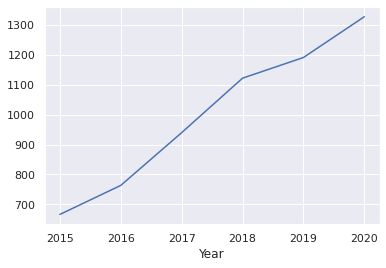

In [ ]:
google.groupby('Year')['Close'].mean().plot()

Compute the average closing price (_Close_) for the month (group data by month - the _Month_ column and then count the average value).

In [ ]:
google.groupby('Month')['Close'].mean()

Month
1    1052.83
2    1044.11
3    1008.99
4    1027.07
5     993.24
6     889.34
7     935.87
8     969.14
9     953.44
10    976.73
11    991.32
12    999.30
Name: Close, dtype: float64

Present the obtained values on the graph using the _plot()_ method.
Note which months may indicate weaker periods on the stock market.

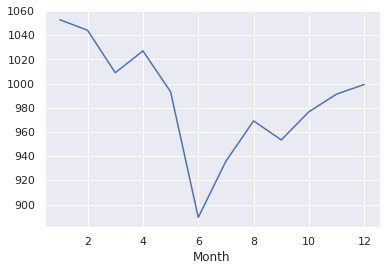

In [ ]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Exercise 125
Group data from _google_ at year and month level. Then calculate the average value.


In [ ]:
google.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2015  5        552.11
      6        550.80
      7        617.47
      8        667.66
      9        647.79
                ...  
2020  1       1436.17
      2       1462.85
      3       1185.14
      4       1230.11
      5       1358.66
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Exercise 126
Find the index for which the _Close_ column has the largest value.


In [ ]:
google['Close'].argmax()

61

Extract the row for this index from the google object as a DataFrame. Read the date.

In [ ]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Year,Month
61,2020-02-19,1527.20,1530.74,1520.98,1524.87,1137338,2020,2


### <a name='7'></a> Exercise 127
Extract the columns _Date_, _Open_, _Close_, _Volume_ from the _google_ object.
Don't change the original _google_ object!

In [ ]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2020-05-15,1348.26,1373.06,2077199
1,2020-05-14,1333.52,1356.86,1833017
2,2020-05-13,1376.16,1348.33,2018404
3,2020-05-12,1408.22,1375.18,1695874
4,2020-05-11,1376.79,1403.59,1635856
...,...,...,...,...
1252,2015-05-27,548.68,554.25,1742200
1253,2015-05-26,552.58,547.19,1866724
1254,2015-05-22,554.46,554.52,1213200
1255,2015-05-21,550.37,556.81,1708500


### <a name='8'></a> Exercise 128
Set the index for the _Date_ column back. Display object _google_.

In [ ]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2020-05-15,1348.26,1374.58,1339.00,1373.06,2077199,2020,5
2020-05-14,1333.52,1357.37,1323.30,1356.86,1833017,2020,5
2020-05-13,1376.16,1385.33,1328.01,1348.33,2018404,2020,5
2020-05-12,1408.22,1414.33,1374.51,1375.18,1695874,2020,5
2020-05-11,1376.79,1415.53,1375.50,1403.59,1635856,2020,5
...,...,...,...,...,...,...,...
2015-05-27,548.68,555.29,546.58,554.25,1742200,2015,5
2015-05-26,552.58,553.33,542.97,547.19,1866724,2015,5
2015-05-22,554.46,558.24,553.62,554.52,1213200,2015,5


### <a name='9'></a> Exercise 129
Permanently remove the _Year_ and _Month_ columns from the _google_ object. Display object _google_.

In [ ]:
google = google.drop(columns=['Year', 'Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-15,1348.26,1374.58,1339.00,1373.06,2077199
2020-05-14,1333.52,1357.37,1323.30,1356.86,1833017
2020-05-13,1376.16,1385.33,1328.01,1348.33,2018404
2020-05-12,1408.22,1414.33,1374.51,1375.18,1695874
2020-05-11,1376.79,1415.53,1375.50,1403.59,1635856
...,...,...,...,...,...
2015-05-27,548.68,555.29,546.58,554.25,1742200
2015-05-26,552.58,553.33,542.97,547.19,1866724
2015-05-22,554.46,558.24,553.62,554.52,1213200


### <a name='10'></a> Exercise 130

Assign the following values to the column names:
* Open -> O
* High -> H
* Low -> L
* Close -> C
* Volume -> V

to object _google_. Display object _google_.

In [ ]:
google.columns = ['O', 'H', 'L', 'C', 'V']
google

,O,H,L,C,V
Date,,,,,
2020-05-15,1348.26,1374.58,1339.00,1373.06,2077199
2020-05-14,1333.52,1357.37,1323.30,1356.86,1833017
2020-05-13,1376.16,1385.33,1328.01,1348.33,2018404
2020-05-12,1408.22,1414.33,1374.51,1375.18,1695874
2020-05-11,1376.79,1415.53,1375.50,1403.59,1635856
...,...,...,...,...,...
2015-05-27,548.68,555.29,546.58,554.25,1742200
2015-05-26,552.58,553.33,542.97,547.19,1866724
2015-05-22,554.46,558.24,553.62,554.52,1213200
